In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### TP1: Actividad 4

4) Una empresa consultora ha entrevistado un grupo de 50 personas a las cuales les han preguntado la edad. Se obtuvieron los siguientes datos:

23	34	21	41	42	35	32	36	27	20
19	31	39	38	41	26	24	27	30	33
23	32	40	34	25	28	29	30	22	24
26	36	38	21	39	22	33	35	32	28
27	26	24	32	37	39	32	24	35	26

Se ha decidido organizar los datos en intervalos. A partir de estos datos, ya organizados, determine:

    a)	Valores de posición: media, mediana y moda. Cuál tomará como representativo de la distribución?
    b)	Valores de Dispersión. Cuál tomará como represntativo?
    c)	Cuartiles. Qué información le proporcionan?
    d)	Representar gráficamente las frecuencias acumuladas.
    e)	Obtener conclusiones.



In [10]:
X = np.array([23, 34, 21, 41, 42, 35, 32, 36, 27, 20, 19, 31, 39, 38, 41, 26, 24, 27, 30, 33, 23, 32, 40, 34, 25, 28, 29, 30, 22, 24, 26, 36, 38, 21, 39, 22, 33, 35, 32, 28, 27, 26, 24, 32, 37, 39, 32, 24, 35, 26])
X = np.sort(X, axis=None)
n = X.size

print("Muestra: ", X)
print("\nTotal muestra: ", n)
print("\nMenor muestra: ", np.min(X))
print("Mayor muestra: ", np.max(X))

Muestra:  [19 20 21 21 22 22 23 23 24 24 24 24 25 26 26 26 26 27 27 27 28 28 29 30
 30 31 32 32 32 32 32 33 33 34 34 35 35 35 36 36 37 38 38 39 39 39 40 41
 41 42]

Total muestra:  50

Menor muestra:  19
Mayor muestra:  42


In [4]:
Xpandas = pd.Series(X)
Xpandas.describe()

count    50.000000
mean     30.360000
std       6.381606
min      19.000000
25%      25.250000
50%      30.500000
75%      35.000000
max      42.000000
dtype: float64

In [8]:
# a) Tabla frecuencias
# Muestra:

R = np.max(X) - np.min(X)
K = (1 + 3.322 * np.log10(X.size))
A = (R / K) 

print("Rango: ", R)
print("Intervalo: ", np.round(K))
print("Amplitud: ", A)

Rango:  23
Intervalo:  7.0
Amplitud:  3.461781296255042


In [12]:
intervalo = np.array([19,23,27,31,35,39,43,47])
frec, bins = np.histogram(X, bins = intervalo) # Frecuencia definida por numpy
print("Frecuencia: ", frec)
print("Intervalo: ", bins)

frecrel = frec / np.sum(X.size)
print("Frecuencia relativa: ", frecrel)

frecrelporc = frecrel * 100
print("Frecuencia relativa: ", frecrelporc)

Frecuencia:  [ 6 11  8 10  8  7  0]
Intervalo:  [19 23 27 31 35 39 43 47]
Frecuencia relativa:  [0.12 0.22 0.16 0.2  0.16 0.14 0.  ]
Frecuencia relativa:  [12. 22. 16. 20. 16. 14.  0.]


In [24]:
# a) 
# Media mediana y moda
# Muestra 

media = (np.sum(X) / np.sum(frec))
print("Media: ", media)

print("Mediana: ", np.median(X))

moda = st.mode(X)
print("Moda: ", moda)

Media:  30.36
Mediana:  30.5
Moda:  ModeResult(mode=array([32]), count=array([5]))


In [20]:
# b) Valores de dispercion

p = np.sum(X) / X.size # Promedio
print("\nPromedio: ", p)

dm = np.sum(np.abs(X - p)) / X.size # la suma del valor absouluto menos el promedio dividido entre el tamaño de muestra
print("\nDesviacion media: ", dm)

S = np.sum(np.square(X - p)) / X.size # Varianza
print("\nVarianza: ", S)

r = np.sqrt(S) # Desvio estandar
print("\nDesvio estandar: ", r)

coeficientevar = (r / media) * 100
print("\nCoeficiente de variacion: ", coeficientevar)


Promedio:  30.36

Desviacion media:  5.48

Varianza:  39.9104

Desvio estandar:  6.317467847167883

Coeficiente de variacion:  20.808523870776956


In [21]:
np.sum(np.abs(X - media))

1995.52

In [31]:
# c) Cuartiles
# Muestra

Q3 = 3 * np.sum(frec) / 4
print("Posicion Q3: ", Q3)

Q2 = 2 * np.sum(frec) / 4
print("Posicion Q2: ", Q2)

Q1 = 1 * np.sum(frec) / 4
print("Posicion Q1: ", Q1)

print(np.percentile(X, 75))
print(np.percentile(X, 50))
print(np.percentile(X, 25))

Posicion Q3:  37.5
Posicion Q2:  25.0
Posicion Q1:  12.5
35.0
30.5
25.25


In [32]:
# Percentiles 
print(np.percentile(X, [0, 10, 20, 30, 40, 50, 60, 70 ,80, 90, 100]))

[19.  22.  24.  26.  27.6 30.5 32.  34.3 36.2 39.  42. ]


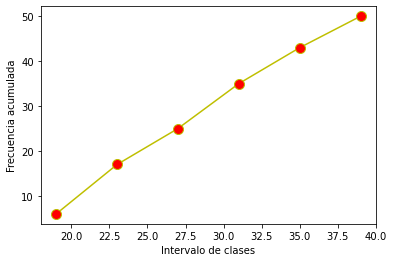

In [30]:
# d) Frecuencias acumuladas: Ojiva
# Ojiva

y = np.array([6, 17, 25, 35, 43, 50]) # Frecuencia acumulada

intervalonew = np.array([19,23,27,31,35,39])
plt.plot(intervalonew, y, c='y', marker='o', ms=10, mfc='red')
plt.xlabel('Intervalo de clases')
plt.ylabel('Frecuencia acumulada')

plt.savefig('Actividad 4 Ojiva (Muestra).png')
plt.show()

In [ ]:
# e) Conclusiones

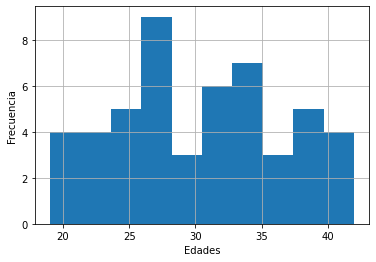

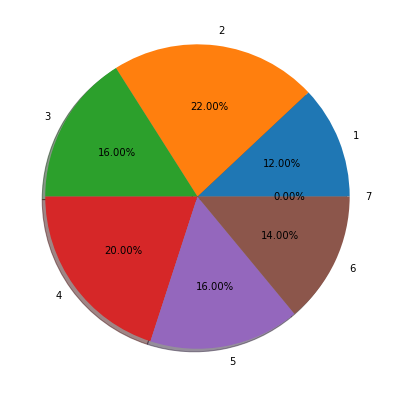

In [36]:

# Muestra
plt.hist(X)
plt.grid(True)
plt.xlabel("Edades")
plt.ylabel("Frecuencia")

# Pie de frecuencias
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(frec, labels=[1, 2, 3, 4, 5, 6, 7], autopct='%.2f%%',shadow=True, labeldistance=1.1)

plt.show()